In [1]:
from nltk import data
data.path.append("/Users/leonwong/nltk_data")

from nltk import word_tokenize #divide words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer #extract word stem
from nltk.corpus import stopwords #stopwords list

from sklearn.feature_extraction.text import TfidfVectorizer #calculate tf-idf
from sklearn.metrics.pairwise import cosine_similarity #calculate cos_sim

In [2]:
#create corpus
text1 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/Covid_vaccination.txt", 'r').read()
text2 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/Covid.txt", 'r').read()
text3 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/Tim_BL.txt", 'r').read()
text4 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/KI.txt", 'r').read()
text5 = open("/Users/leonwong/Desktop/WDS/code/text_similarity/corpus/KI_Covid.txt", 'r').read()

In [3]:
def get_words(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    cleanned_words = []
    for wd in text:
        if wd.lower() not in stop_words:
            cleanned_words.append(wd.lower())
            
    return cleanned_words

def get_lemmas(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

In [5]:
#Jaccard similarity
def get_jaccard_similarity(text1, text2):
    words_text1 = get_lemmas(remove_stopwords(get_words(text1)))
    words_text2 = get_lemmas(remove_stopwords(get_words(text2)))
    
    nr = len(set(words_text1).intersection(set(words_text2)))
    dr = len(set(words_text2).union(set(words_text2)))
    
    jaccard_sim = nr / dr
    return jaccard_sim

In [6]:
#TF-IDF and Cosine similarity

#preprocess for tfidf vectorize
def preprocess(text):
    text_without_stopwords = ""
    for wd in get_lemmas(remove_stopwords(get_words(text))):
        text_without_stopwords += ' ' + wd
    return text_without_stopwords

#extract the document feature vector
def get_tf_idf_vectors(corpus):
    tfidf_vectorizer = TfidfVectorizer(smooth_idf=True)
    tfidf_results = tfidf_vectorizer.fit_transform(corpus).todense()
    return tfidf_results

#combine all corpus
corpus = [preprocess(text1), preprocess(text2), preprocess(text3), preprocess(text4), preprocess(text5)]
tf_idf_vectors = get_tf_idf_vectors(corpus)

#get the cosine similarity
def get_cosine_similarity(vector1, vector2):
    return cosine_similarity(vector1, vector2)

In [7]:
jac_sim1 = get_jaccard_similarity(text1, text2)
jac_sim2 = get_jaccard_similarity(text1, text3)
jac_sim3 = get_jaccard_similarity(text1, text4)
jac_sim4 = get_jaccard_similarity(text1, text5)
jac_sim5 = get_jaccard_similarity(text2, text3)
jac_sim6 = get_jaccard_similarity(text2, text4)
jac_sim7 = get_jaccard_similarity(text2, text5)
jac_sim8 = get_jaccard_similarity(text3, text4)
jac_sim9 = get_jaccard_similarity(text3, text5)
jac_sim10 = get_jaccard_similarity(text4, text5)

In [8]:
tfidf1 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[1])
tfidf2 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[2])
tfidf3 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[3])
tfidf4 = get_cosine_similarity(tf_idf_vectors[0], tf_idf_vectors[4])
tfidf5 = get_cosine_similarity(tf_idf_vectors[1], tf_idf_vectors[2])
tfidf6 = get_cosine_similarity(tf_idf_vectors[1], tf_idf_vectors[3])
tfidf7 = get_cosine_similarity(tf_idf_vectors[1], tf_idf_vectors[4])
tfidf8 = get_cosine_similarity(tf_idf_vectors[2], tf_idf_vectors[3])
tfidf9 = get_cosine_similarity(tf_idf_vectors[2], tf_idf_vectors[4])
tfidf10 = get_cosine_similarity(tf_idf_vectors[3], tf_idf_vectors[4])

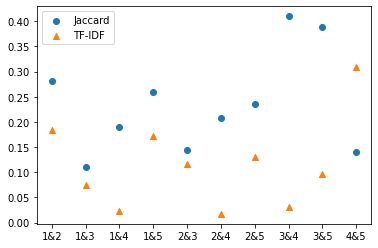

Text Theme:
1: Covid-19 vaccination
2: Covid-19 situation
3: Introduction of Tim Berners-Lee
4: Introduction of Kyrie Irving
5: Kyrie Irving rejected Covid-19 vaccination


In [10]:
import matplotlib.pyplot as plt
import numpy as np
# Ensure that the picture is displayed normally in the browser
%matplotlib inline

x = np.array(["1&2", "1&3", "1&4", "1&5", "2&3", "2&4", "2&5", "3&4", "3&5", "4&5"])
y1 = np.array([jac_sim1, jac_sim2, jac_sim3, jac_sim4, jac_sim5, jac_sim6, jac_sim7, jac_sim8, jac_sim9, jac_sim10])
y2 = np.array([tfidf1, tfidf2, tfidf3, tfidf4, tfidf5, tfidf6, tfidf7, tfidf8, tfidf9, tfidf10])


plt.scatter(x, y1, marker='o', label="Jaccard")
plt.scatter(x, y2, marker='^', label="TF-IDF")

plt.legend(loc='best')
plt.show()
print("Text Theme:\n"
      "1: Covid-19 vaccination\n"
       "2: Covid-19 situation\n"
       "3: Introduction of Tim Berners-Lee\n"
       "4: Introduction of Kyrie Irving\n"
       "5: Kyrie Irving rejected Covid-19 vaccination")